In [1]:
import sys; sys.path.insert(0,'../')
from notebook_tools import *
from matplotlib.ticker import NullFormatter,MultipleLocator, FormatStrFormatter
from matplotlib import ticker
%matplotlib inline

# load or trees, apply required cuts and modify variable names

In [2]:
variables = ['A'
             ,'Xb'   
             ,'Pmiss.P()'    ,'Pmiss.Pt()' 
             ,'theta_pq'     ,'p_over_q' 
             ,'Pcm.Mag()','PcmFinalState.P()' , 'PcmFinalState.Pt()'
             ,'Pcm.Px()' , 'Pcm.Py()'  , 'Pcm.Pz()', 'Pcm.Pt()', 'Pcm.P()'
             ,'pEdep[0]', 'pEdep[1]', 'pEdep[2]'
             ,'pCTOFCut[0]', 'pCTOFCut[1]', 'pCTOFCut[2]'
             ,'pEdep','protons.P()'
             ,'protons[0].P()', 'protons[1].P()','protons[2].P()'
             ,'protons[0].Theta()','protons[1].Theta()','protons[2].Theta()'
             ,'TMath::RadToDeg()*protons[0].Theta()', 'TMath::RadToDeg()*protons[1].Theta()',  'TMath::RadToDeg()*protons[2].Theta()' 
             ,'alpha[0]','alpha[1]','alpha[2]','alpha_q'
             ,'pVertex[0].Z()','pVertex[1].Z()','pVertex[2].Z()'
             ,'T23','E_R','m23','k23'
            ]

In [6]:
allfile = ROOT.TFile('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_SRCXb_NoCTofDATA_C12.root')
alltree = allfile.Get('anaTree') 
allana = tree2array( alltree, branches=variables )

## cuts

## Bjorken x

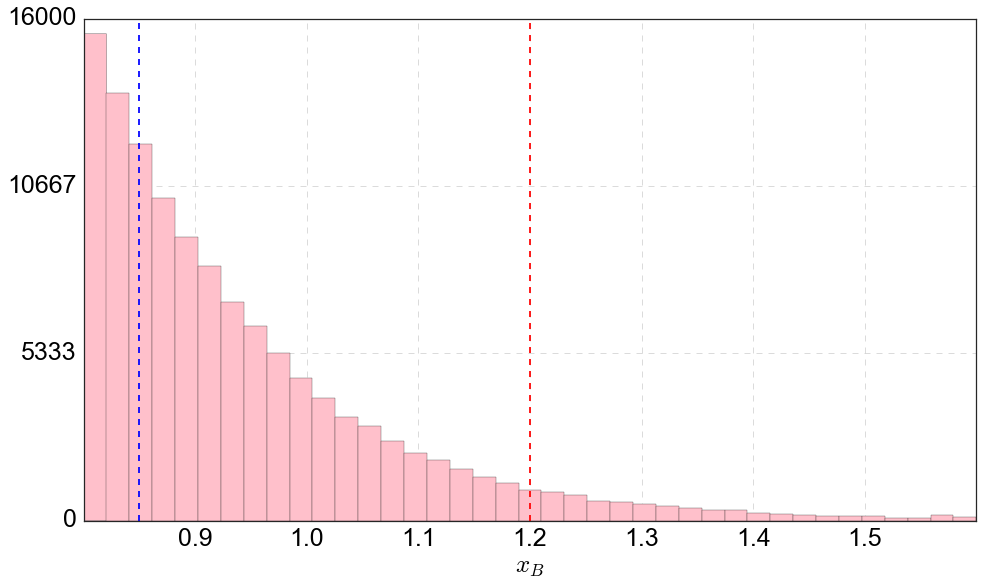

In [40]:
fix,ax=plt.subplots(figsize=(16,9))
sample = allana
ax.hist(sample['Xb'],bins=np.linspace(0.8,1.6,40),color='pink');
set_axes(ax,'$x_B$')
ax.xaxis.set_ticks([0.9,1,1.1,1.2,1.3,1.4,1.5]);
plt.plot([1.2,1.2],ax.get_ylim(),'--',color='red')
plt.plot([0.85,0.85],ax.get_ylim(),'--',color='blue')

ax.grid(linestyle='--',alpha=0.7)

## leading proton ID

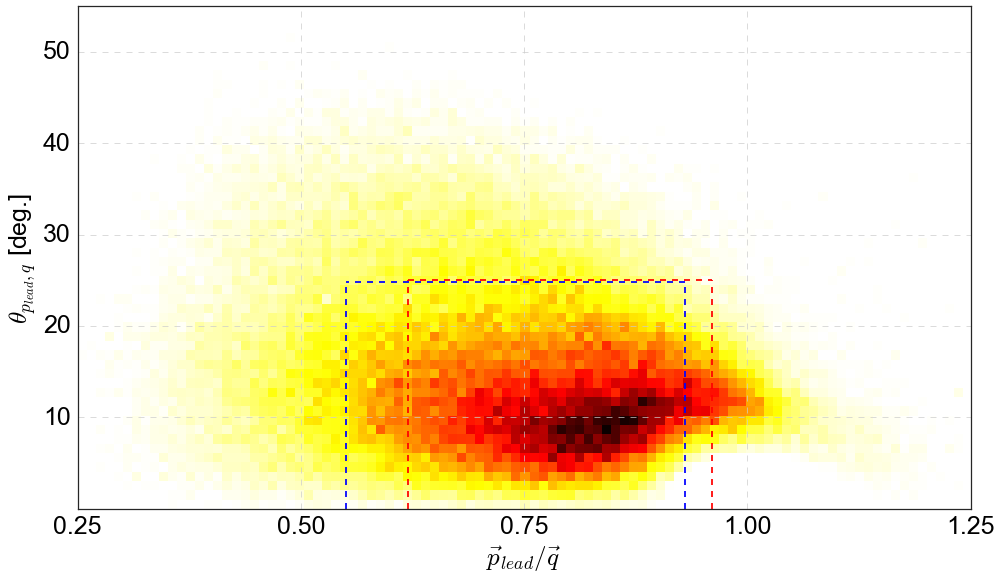

In [12]:
fix,ax=plt.subplots(figsize=(16,9))
sample = allana[(allana['Pmiss.P()']>0.3)&(allana['Pmiss.P()']<1.0)
               &(allana['pCTOFCut[0]']==1)
               &(allana['pVertex[0].Z()']>-27)&(allana['pVertex[0].Z()']<-20)]
plot_2d_hist(sample['p_over_q'],sample['theta_pq'],ax=ax,xlabel='$\\vec{p}_{lead}/\\vec{q}$',ylabel='$\\theta_{p_{lead},q}$ [deg.]'
             ,bins=(np.linspace(0.25,1.25,100),np.linspace(0,55,55)));
ax.xaxis.set_ticks([0.25,0.5,0.75,1,1.25]);ax.yaxis.set_ticks([10,20,30,40,50]);
plt.plot([0.62,0.62],[0,25],'--',color='red')
plt.plot([0.62,0.96],[25,25],'--',color='red')
plt.plot([0.96,0.96],[0,25],'--',color='red')
plt.plot([0.93,0.93],[0,24.8],'--',color='blue')
plt.plot([0.93,0.55],[24.8,24.8],'--',color='blue')
plt.plot([0.55,0.55],[0,24.8],'--',color='blue')
ax.grid(linestyle='--',alpha=0.7)

## Pmiss

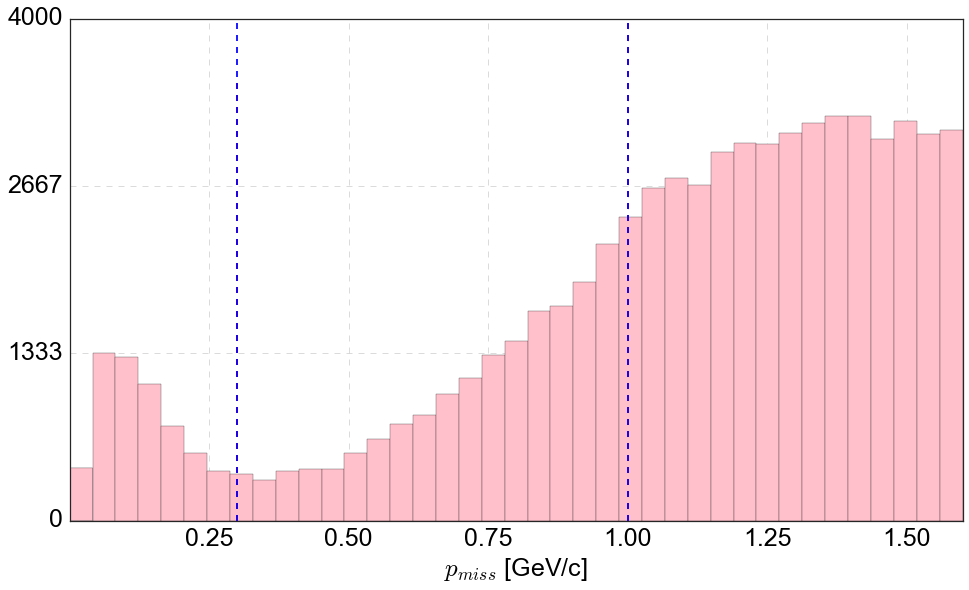

In [45]:
fix,ax=plt.subplots(figsize=(16,9))
sample = allana
ax.hist(sample['Pmiss.P()'],bins=np.linspace(0.,1.6,40),color='pink');
set_axes(ax,'$p_{miss}$ [GeV/c]')
ax.xaxis.set_ticks([0.25,0.5,0.75,1,1.25,1.5]);
plt.plot([.3,.3],ax.get_ylim(),'--',color='red')
plt.plot([1.,1.],ax.get_ylim(),'--',color='red')
plt.plot([.3,.3],ax.get_ylim(),'--',color='blue')
plt.plot([1.,1.],ax.get_ylim(),'--',color='blue')

ax.grid(linestyle='--',alpha=0.7)

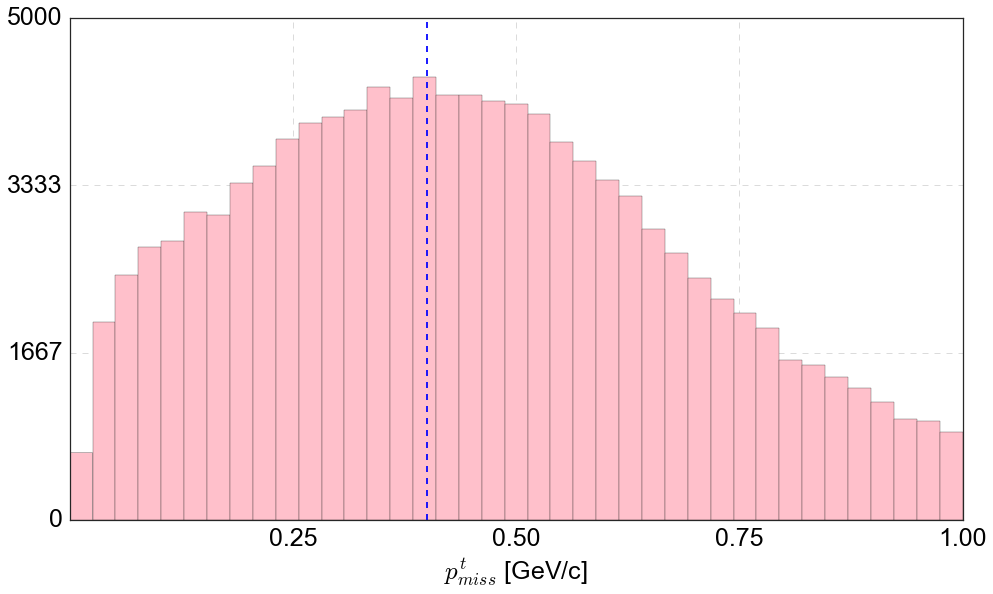

In [52]:
fix,ax=plt.subplots(figsize=(16,9))
sample = allana
ax.hist(sample['Pmiss.Pt()'],bins=np.linspace(0.,1.,40),color='pink');
set_axes(ax,'$p_{miss}^{t}$ [GeV/c]')
ax.xaxis.set_ticks([0.25,0.5,0.75,1,1.25,1.5]);
plt.plot([.0,.0],ax.get_ylim(),'--',color='red')
plt.plot([.4,.4],ax.get_ylim(),'--',color='blue')

ax.grid(linestyle='--',alpha=0.7)

## vertex

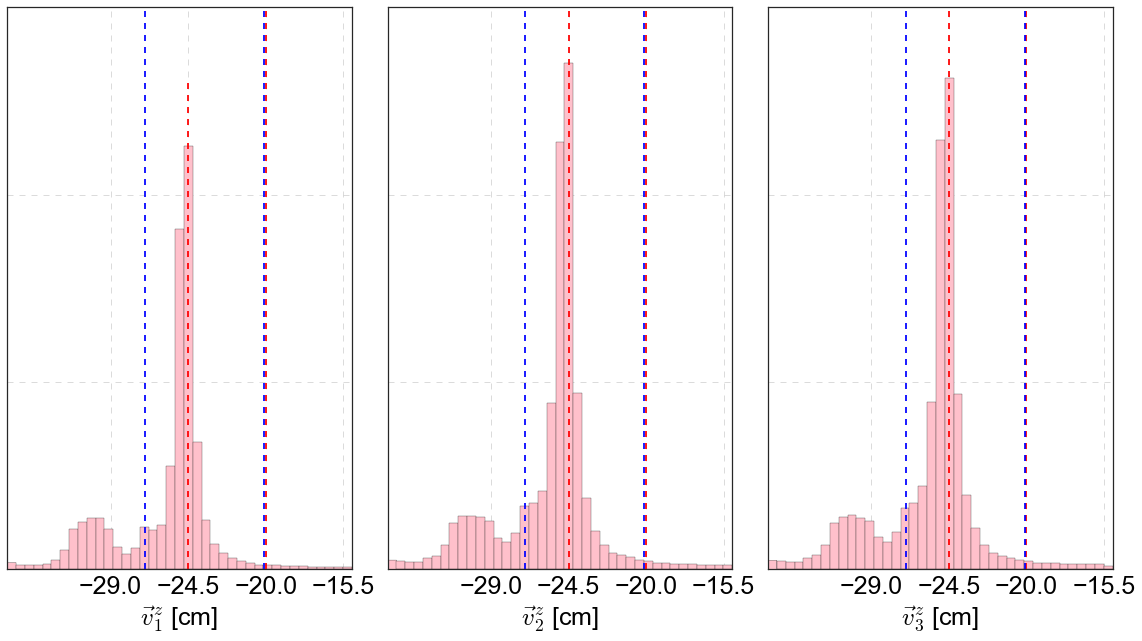

In [65]:
fig=plt.figure(figsize=(16,9))
sample = allana
for i in range(3):
    ax=fig.add_subplot(1,3,i+1)
    ax.hist(sample['pVertex[%d].Z()'%i],bins=np.linspace(-35,-15,40),color='pink');
    set_axes(ax,'$\\vec{v}_{%d}^{z}$ [cm]'%(i+1),y_label='')
    ax.grid(linestyle='--',alpha=0.7)
    ax.yaxis.set_major_formatter(ticker.NullFormatter())
    ax.xaxis.set_ticks([-29,-24.5,-20,-15.5]);
    plt.plot([-24.5,-24.5],ax.get_ylim(),'--',color='red')
    plt.plot([-20,-20],ax.get_ylim(),'--',color='red')
    plt.plot([-27,-27],ax.get_ylim(),'--',color='blue')
    plt.plot([-20.1,-20.1],ax.get_ylim(),'--',color='blue')
plt.tight_layout()

# selected ppp-candidates

In [7]:
selected_file = ROOT.TFile('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_pppSRCCut_NoCTofDATA_C12.root')
selected_tree = selected_file.Get('anaTree') 
selected = tree2array( selected_tree, branches=variables )

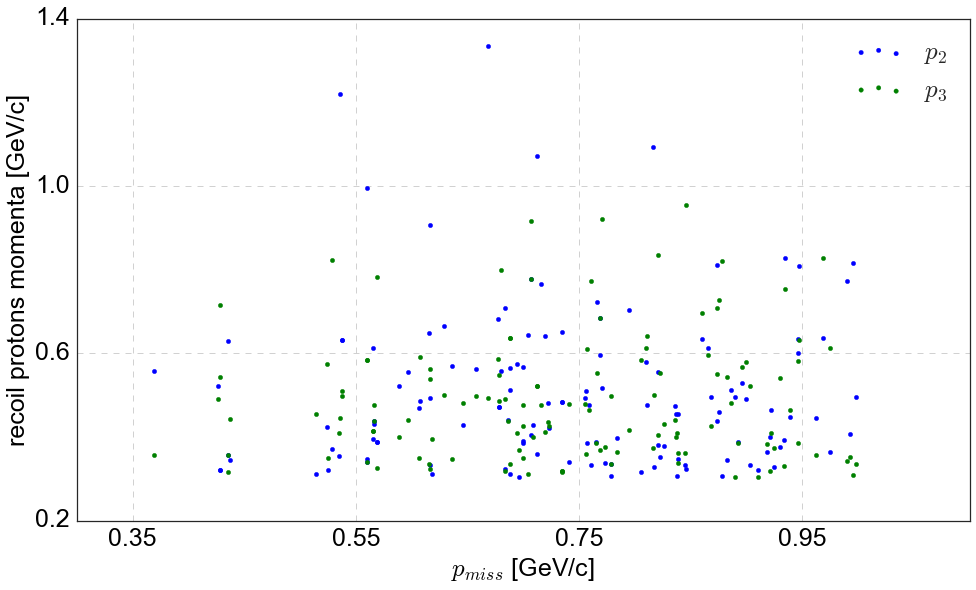

In [8]:
fig,ax=plt.subplots(figsize=(16,9))
plt.scatter(selected['Pmiss.P()'],selected['protons[1].P()'],color='blue',label='$p_2$')
plt.scatter(selected['Pmiss.P()'],selected['protons[2].P()'],color='green',label='$p_3$')
set_axes(ax,'$p_{miss}$ [GeV/c]','recoil protons momenta [GeV/c]')
ax.xaxis.set_ticks([0.35,0.55,0.75,0.95]);
ax.grid(linestyle='--',alpha=0.9)
ax.legend(fontsize=25,scatterpoints=3)

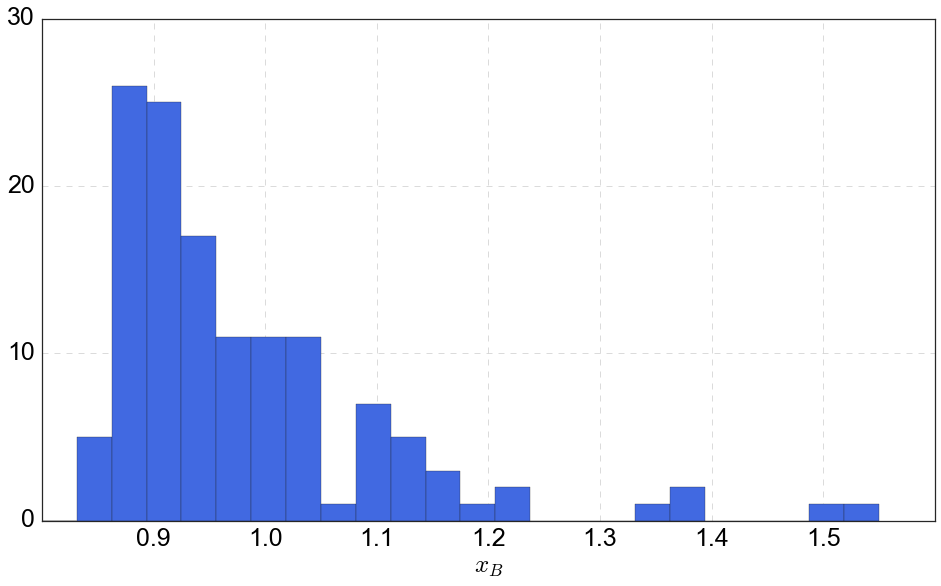

In [9]:
fix,ax=plt.subplots(figsize=(16,9))
ax.hist(selected['Xb'],bins=np.linspace(0.8,1.55,25),color='royalblue');
set_axes(ax,'$x_B$')
ax.xaxis.set_ticks([0.9,1,1.1,1.2,1.3,1.4,1.5]);
ax.grid(linestyle='--',alpha=0.7)

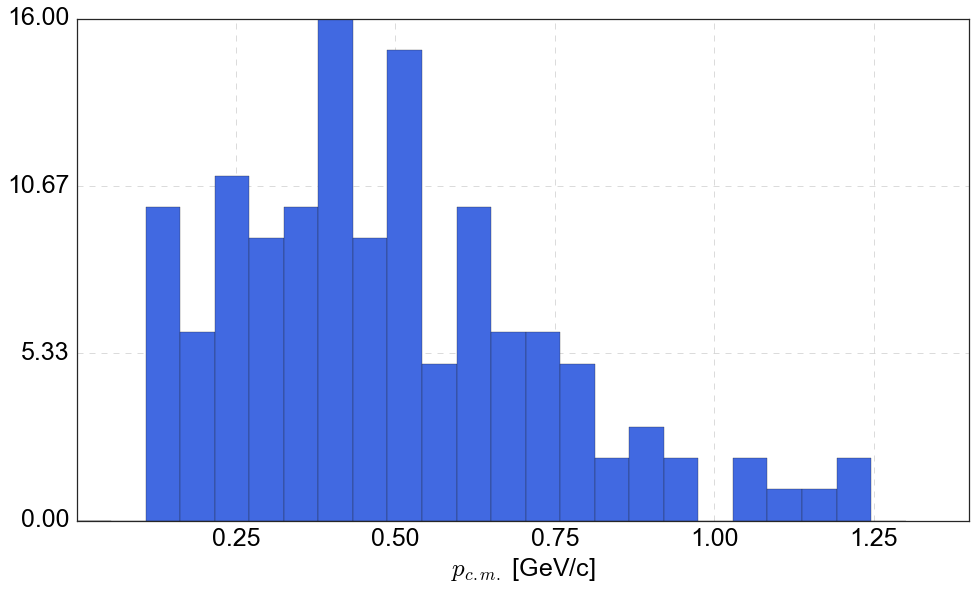

In [10]:
fix,ax=plt.subplots(figsize=(16,9))
ax.hist(selected['Pcm.P()'],bins=np.linspace(0.,1.3,25),color='royalblue');
set_axes(ax,'$p_{c.m.}$ [GeV/c]')
ax.xaxis.set_ticks([0.25,0.5,0.75,1,1.25]);
ax.grid(linestyle='--',alpha=0.7)

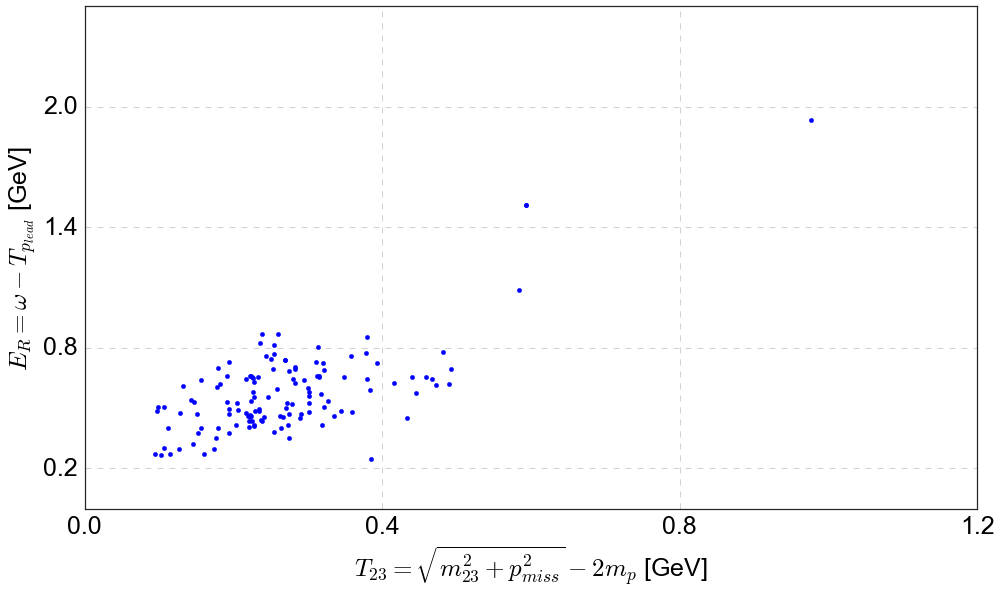

In [24]:
fig,ax=plt.subplots(figsize=(16,9))
plt.scatter(selected['T23'],selected['E_R'],color='blue')
set_axes(ax,'$T_{23} = \\sqrt{m_{23}^{2} + p_{miss}^{2}} - 2m_p $ [GeV]','$E_R = \\omega - T_{p_{lead}}$ [GeV]')
ax.yaxis.set_ticks([0.2,0.8,1.4,2]);
ax.grid(linestyle='--',alpha=0.9)

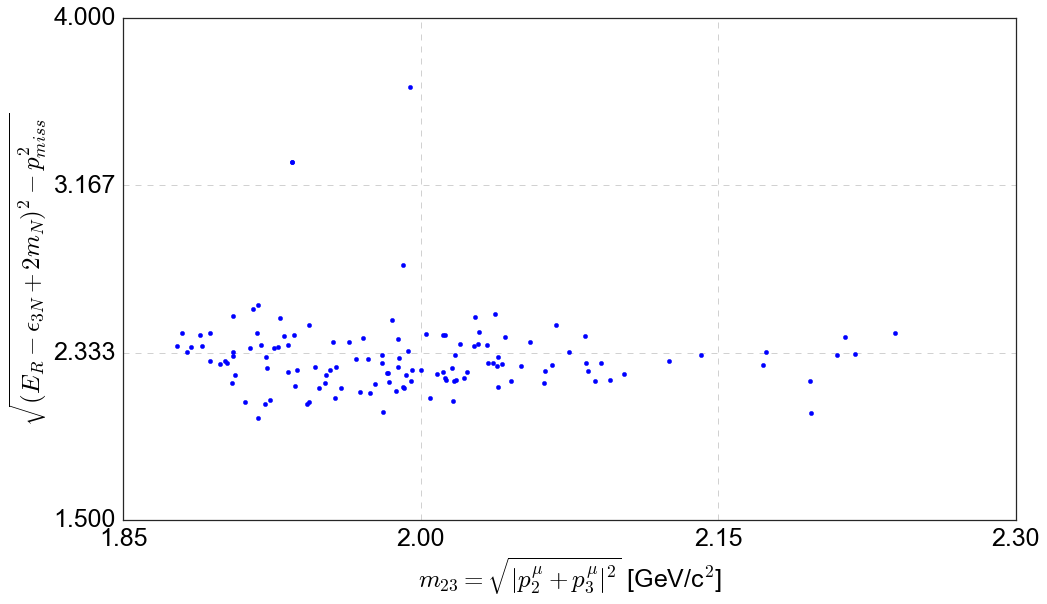

In [30]:
fig,ax=plt.subplots(figsize=(16,9))
eps_B = 0.0077 # 12C binding energy per nucleon
eps_3N = 3 * eps_B
plt.scatter(selected['m23'],np.sqrt( np.square(selected['E_R'] - eps_3N + 2*0.938) - np.square(selected['Pmiss.P()']) ),color='blue')
set_axes(ax,'$m_{23} = \\sqrt{|p_{2}^{\\mu}+p_{3}^{\\mu}|^{2}}$ [GeV/c$^{2}$]','$\\sqrt{ (E_R - \epsilon_{3N} + 2m_N)^{2} - p_{miss}^{2}}$')
ax.grid(linestyle='--',alpha=0.9)

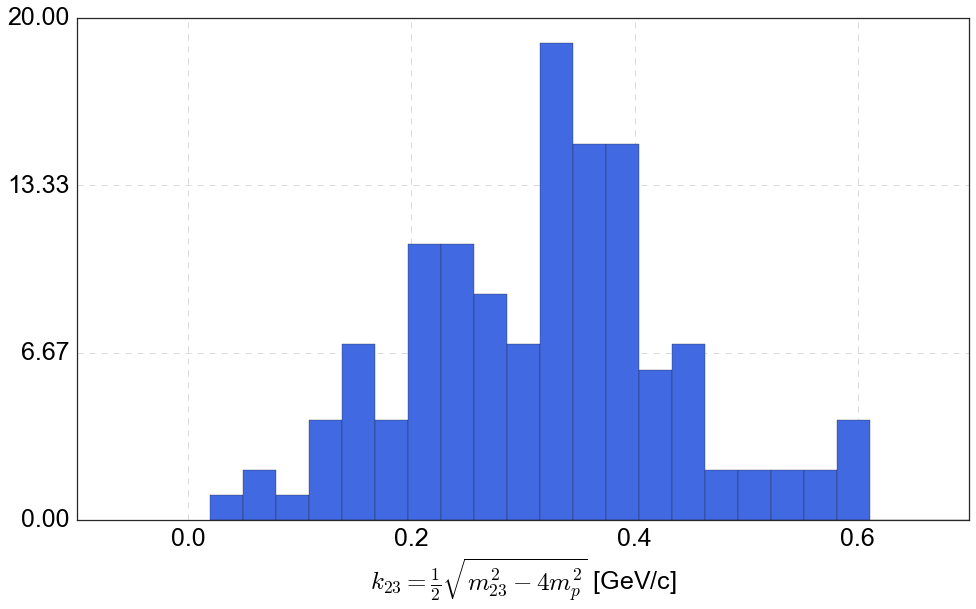

In [16]:
fix,ax=plt.subplots(figsize=(16,9))
ax.hist(selected['k23'],bins=np.linspace(-0.01,0.7,25),color='royalblue');
set_axes(ax,'$k_{23} = \\frac{1}{2}\\sqrt{m_{23}^2 - 4m_p^2}$ [GeV/c]')
ax.xaxis.set_ticks([0.,0.2,0.4,0.6]);
ax.grid(linestyle='--',alpha=0.7)